In [1]:
#import required libraries


# Pandas 
import pandas as pd
from pandas import Series,DataFrame 

# Numpy and Matplotlib
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
#sns.set_style('whitegrid')
# Machine Learning 
from sklearn import preprocessing

# In a notebook environment, display the plots inline
%matplotlib inline

# Set some parameters to apply to all plots. These can be overridden
# in each plot if desired
import matplotlib
# Plot size to 14" x 7"
matplotlib.rc('figure', figsize = (14, 7))
# Font size to 14
matplotlib.rc('font', size = 14)
# Do not display top and right frame lines
matplotlib.rc('axes.spines', top = False, right = False)
# Remove grid lines
matplotlib.rc('axes', grid = False)
# Set backgound color to white
matplotlib.rc('axes', facecolor = 'white')


In [2]:
#Read files:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")


In [3]:
train['source']='train'
test['source']='test'
data = pd.concat([train, test],ignore_index=True)
print(train.shape, test.shape, data.shape)
data.to_csv("data_before.csv",index=False)
print(data.source.value_counts())

(79853, 14) (34224, 13) (114077, 14)
train    79853
test     34224
Name: source, dtype: int64


In [4]:
#Missing Values?
print(data.apply(lambda x: sum(x.isnull())))


Count_3-6_months_late                 128
Count_6-12_months_late                128
Count_more_than_12_months_late        128
Income                                  0
age_in_days                             0
application_underwriting_score       4297
id                                      0
no_of_premiums_paid                     0
perc_premium_paid_by_cash_credit        0
premium                                 0
renewal                             34224
residence_area_type                     0
source                                  0
sourcing_channel                        0
dtype: int64


In [5]:
# There are null values that need to be examined and fixed for the following columns
# Count_3-6_months_late                 128
# Count_6-12_months_late                128
# Count_more_than_12_months_late        128
# application_underwriting_score       4297

#renewal                             34224 - this is not actually null. 'renewal' is the target variable and missing values are ones in the test set. Which is fine!


In [6]:
print(data['Count_3-6_months_late'].value_counts().sum()) 


113949


In [7]:
print(data['Count_3-6_months_late'].value_counts())


0.0     95629
1.0     12560
2.0      3513
3.0      1302
4.0       534
5.0       237
6.0       100
7.0        38
8.0        21
9.0         9
12.0        2
10.0        2
11.0        1
13.0        1
Name: Count_3-6_months_late, dtype: int64


In [8]:
#Values 0.0 and 1.0 account to 95% of the total population of the data
# 0.0 is 84% of the whole data set (training+testing) - so we can safely substitute the null values for 3-6 months late by 0.0
print(data['Count_3-6_months_late'].fillna(0.0,inplace=True))


None


In [9]:
print(data.apply(lambda x: sum(x.isnull())))


Count_3-6_months_late                   0
Count_6-12_months_late                128
Count_more_than_12_months_late        128
Income                                  0
age_in_days                             0
application_underwriting_score       4297
id                                      0
no_of_premiums_paid                     0
perc_premium_paid_by_cash_credit        0
premium                                 0
renewal                             34224
residence_area_type                     0
source                                  0
sourcing_channel                        0
dtype: int64


In [10]:
print(data['Count_6-12_months_late'].value_counts().sum()) 


113949


In [11]:
print(data['Count_6-12_months_late'].value_counts())


0.0     108352
1.0       3796
2.0       1005
3.0        436
4.0        186
5.0         74
6.0         44
7.0         18
9.0         12
8.0         10
10.0         7
14.0         2
11.0         2
13.0         2
12.0         1
17.0         1
15.0         1
Name: Count_6-12_months_late, dtype: int64


In [12]:
#Values 0.0 and 1.0 account to 98% of the total population of the data
# 0.0 is 94% of the whole data set (training+testing) - so we can safely substitute the null values for 6-12 months late by 0.0
print(data['Count_6-12_months_late'].fillna(0.0,inplace=True))


None


In [13]:
print(data['Count_more_than_12_months_late'].value_counts().sum()) 


113949


In [14]:
print(data['Count_more_than_12_months_late'].value_counts())


0.0     108687
1.0       4237
2.0        718
3.0        203
4.0         62
5.0         22
6.0         13
7.0          4
8.0          2
11.0         1
Name: Count_more_than_12_months_late, dtype: int64


In [15]:
#Values 0.0 and 1.0 account to 99% of the total population of the data
# 0.0 is 95% of the whole data set (training+testing) - so we can safely substitute the null values for more than 12 months late by 0.0
print(data['Count_more_than_12_months_late'].fillna(0.0,inplace=True))


None


In [16]:
print(data.apply(lambda x: sum(x.isnull())))


Count_3-6_months_late                   0
Count_6-12_months_late                  0
Count_more_than_12_months_late          0
Income                                  0
age_in_days                             0
application_underwriting_score       4297
id                                      0
no_of_premiums_paid                     0
perc_premium_paid_by_cash_credit        0
premium                                 0
renewal                             34224
residence_area_type                     0
source                                  0
sourcing_channel                        0
dtype: int64


In [17]:
data['application_underwriting_score'].value_counts().sum() 

109780

In [18]:
data['application_underwriting_score'].value_counts()

99.89    2835
99.88    1940
99.87    1237
99.86     967
99.30     904
99.32     900
99.38     898
99.23     895
99.28     890
99.18     880
99.46     878
99.42     876
99.37     874
99.31     873
99.36     871
99.35     867
99.25     862
99.27     858
99.43     858
99.33     853
99.29     849
99.39     843
99.22     838
99.17     837
99.48     828
99.16     828
99.19     827
99.52     826
99.26     825
99.40     825
         ... 
93.04       1
94.26       1
92.55       1
94.25       1
94.65       1
93.43       1
92.56       1
92.12       1
93.59       1
93.13       1
92.20       1
92.37       1
93.18       1
94.79       1
92.47       1
92.07       1
95.45       1
94.96       1
92.78       1
93.14       1
93.91       1
92.26       1
92.24       1
95.81       1
93.29       1
93.21       1
92.97       1
92.42       1
92.63       1
92.74       1
Name: application_underwriting_score, Length: 713, dtype: int64

In [19]:
# In this case we cannot ascertain that a particular value is mostly/frequently/populary used. So we will go with the substituting the null values with the mean

data['application_underwriting_score'].fillna(data['application_underwriting_score'].mean(),inplace=True)


In [20]:
data.apply(lambda x: sum(x.isnull()))
print('\n')
print(data.source.value_counts())



train    79853
test     34224
Name: source, dtype: int64


In [21]:
# All missing values taken care of :)

In [22]:
# Now let's check for any duplicate rows

data.duplicated()

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
114047    False
114048    False
114049    False
114050    False
114051    False
114052    False
114053    False
114054    False
114055    False
114056    False
114057    False
114058    False
114059    False
114060    False
114061    False
114062    False
114063    False
114064    False
114065    False
114066    False
114067    False
114068    False
114069    False
114070    False
114071    False
114072    False
114073    False
114074    False
114075    False
114076    False
Length: 114077, dtype: b

In [23]:
# Above is not really readable. We can use our aggregate sum function to get a count of duplicate line items
data.duplicated().sum()

0

In [24]:
# There are no duplicates in the data set
# I have also scanned the dataset for any irrelevant data, but have found none
# Nor does any have any structural errors for example - Yes, No, Y, N/A etc. So we are good there!

In [25]:
#Lastly, but most important step is to check for Outliers
# First we will try to find outliers using plots and then we will also use a algorathmic technique to refine or validate our results

In [26]:
#Outlier analysis using plots
data.head()
print('\n')
print(data.source.value_counts())



train    79853
test     34224
Name: source, dtype: int64


In [27]:
#sns.boxplot(x='Income',y='renewal', data=data, palette='hls')

In [28]:
data.columns

Index(['Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'Income', 'age_in_days',
       'application_underwriting_score', 'id', 'no_of_premiums_paid',
       'perc_premium_paid_by_cash_credit', 'premium', 'renewal',
       'residence_area_type', 'source', 'sourcing_channel'],
      dtype='object')

In [29]:
#sns.pairplot(data, hue='renewal',palette='hls')

In [30]:
import itertools
from sklearn.metrics import roc_curve, auc, roc_auc_score, log_loss, accuracy_score, confusion_matrix

def plot_cm(ax, y_true, y_pred, classes, title, th=0.5, cmap=plt.cm.Blues):
    y_pred_labels = (y_pred>th).astype(int)
    
    cm = confusion_matrix(y_true, y_pred_labels)
    
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title)

    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')

# def plot_auc(ax, y_train, y_train_pred, y_test, y_test_pred, th=0.5):

#     y_train_pred_labels = (y_train_pred>th).astype(int)
#     y_test_pred_labels  = (y_test_pred>th).astype(int)

#     fpr_train, tpr_train, _ = roc_curve(y_train,y_train_pred)
#     roc_auc_train = auc(fpr_train, tpr_train)
#     acc_train = accuracy_score(y_train, y_train_pred_labels)

#     fpr_test, tpr_test, _ = roc_curve(y_test,y_test_pred)
#     roc_auc_test = auc(fpr_test, tpr_test)
#     acc_test = accuracy_score(y_test, y_test_pred_labels)

#     ax.plot(fpr_train, tpr_train)
#     ax.plot(fpr_test, tpr_test)

#     ax.plot([0, 1], [0, 1], 'k--')

#     ax.set_xlim([0.0, 1.0])
#     ax.set_ylim([0.0, 1.05])
#     ax.set_xlabel('False Positive Rate')
#     ax.set_ylabel('True Positive Rate')
#     ax.set_title('ROC curve')
    
#     train_text = 'train acc = {:.3f}, auc = {:.2f}'.format(acc_train, roc_auc_train)
#     test_text = 'test acc = {:.3f}, auc = {:.2f}'.format(acc_test, roc_auc_test)
#     ax.legend([train_text, test_text])

def plot_auc(ax, y_train, y_train_pred, th=0.5):

    y_train_pred_labels = (y_train_pred>th).astype(int)
  
    fpr_train, tpr_train, _ = roc_curve(y_train,y_train_pred)
    roc_auc_train = auc(fpr_train, tpr_train)
    acc_train = accuracy_score(y_train, y_train_pred_labels)

  
    ax.plot(fpr_train, tpr_train)
  
    ax.plot([0, 1], [0, 1], 'k--')

    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC curve')
    
    train_text = 'train acc = {:.3f}, auc = {:.2f}'.format(acc_train, roc_auc_train)
    ax.legend([train_text])


# #Function to check whether the column has any outliers
# # argument to be passed is the column name from the data frame

# def any_outliers(x): 
#     return np.abs(x- x.median()) > 1.5*(x.quantile(.75)-x.quantile(0.25))


# # Function to remove outliers
# # argument is the column name from the data frame

# def outlier_removal(y):
#     arr = y
#     elements = np.array(arr)
#     mean = np.mean(elements, axis=0)
#     sd = np.std(elements, axis=0)

#     final_list = [x for x in arr if (x > mean - 2 * sd)]
#     final_list = [x for x in final_list if (x < mean + 2 * sd)]
#     return pd.DataFrame(final_list) 

# # Plot Density and Box Plot

# def plot_graphs(z):
#     plt.figure(figsize=(10,8))
#     plt.subplot(211)
#     plt.xlim(z.min(), z.max()*1.1)

#     ax = z.plot(kind='kde')

#     plt.subplot(212)
#     plt.xlim(z.min(), z.max()*1.1)
#     sns.boxplot(x=z)






train    79853
test     34224
Name: source, dtype: int64


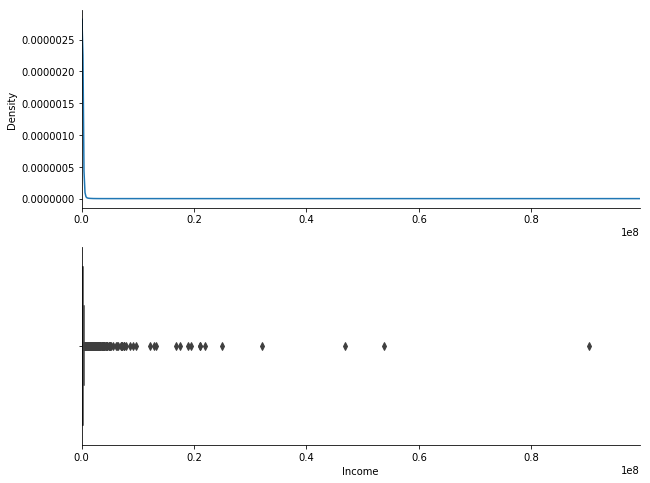

In [31]:
i = 'Income'
 
plt.figure(figsize=(10,8))
plt.subplot(211)
plt.xlim(data[i].min(), data[i].max()*1.1)
 
ax = data[i].plot(kind='kde')
 
plt.subplot(212)
plt.xlim(data[i].min(), data[i].max()*1.1)
sns.boxplot(x=data[i])

print('\n')
print(data.source.value_counts())

In [32]:

# Remove any zeros (otherwise we get (-inf)
data.loc[data.Income == 0, 'Income'] = np.nan
 
# # Drop NA
# data.dropna(inplace=True)
 
# Log Transform
data['Log_' + i] = np.log(data[i])

In [33]:
data.head()

,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,Income,age_in_days,application_underwriting_score,id,no_of_premiums_paid,perc_premium_paid_by_cash_credit,premium,renewal,residence_area_type,source,sourcing_channel,Log_Income
0,0.0,0.0,0.0,355060.0,12058,99.02,110936,13,0.429,3300,1.0,Urban,train,C,12.780042
1,0.0,0.0,0.0,315150.0,21546,99.89,41492,21,0.010,18000,1.0,Urban,train,A,12.660804
2,2.0,3.0,1.0,84140.0,17531,98.69,31300,7,0.917,3300,0.0,Rural,train,C,11.340237
3,0.0,0.0,0.0,250510.0,15341,99.57,19415,9,0.049,9600,1.0,Urban,train,A,12.431254
4,0.0,0.0,0.0,198680.0,31400,99.87,99379,12,0.052,9600,1.0,Urban,train,B,12.199451




train    79853
test     34224
Name: source, dtype: int64


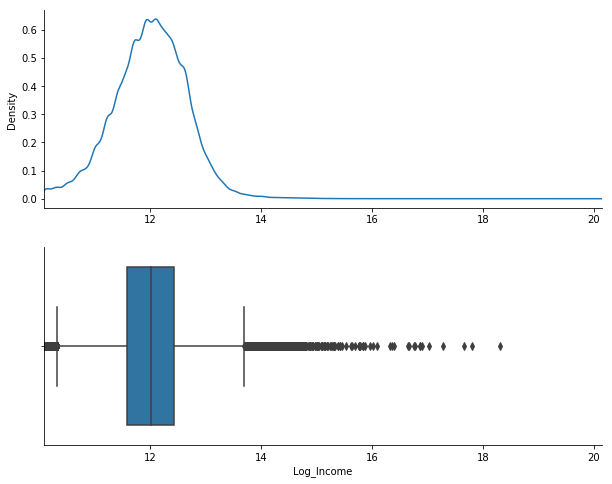

In [34]:
i = 'Log_Income'
 
plt.figure(figsize=(10,8))
plt.subplot(211)
plt.xlim(data[i].min(), data[i].max()*1.1)
 
ax = data[i].plot(kind='kde')
 
plt.subplot(212)
plt.xlim(data[i].min(), data[i].max()*1.1)
sns.boxplot(x=data[i])

print('\n')
print(data.source.value_counts())

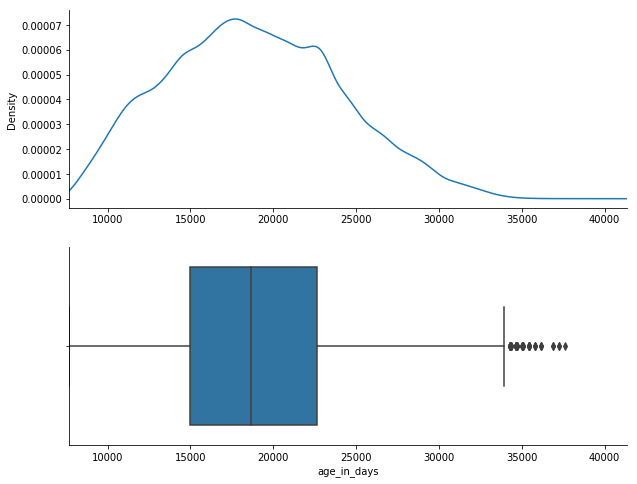

In [35]:
i = 'age_in_days'
 
plt.figure(figsize=(10,8))
plt.subplot(211)
plt.xlim(data[i].min(), data[i].max()*1.1)
 
ax = data[i].plot(kind='kde')
 
plt.subplot(212)
plt.xlim(data[i].min(), data[i].max()*1.1)
sns.boxplot(x=data[i])

In [36]:
# Remove any zeros (otherwise we get (-inf)
#data.loc[data.age_in_days == 0, 'age_in_days'] = np.nan
 
# # Drop NA
# data.dropna(inplace=True)
 
# Log Transform
data['Log_' + i] = np.log(data[i])

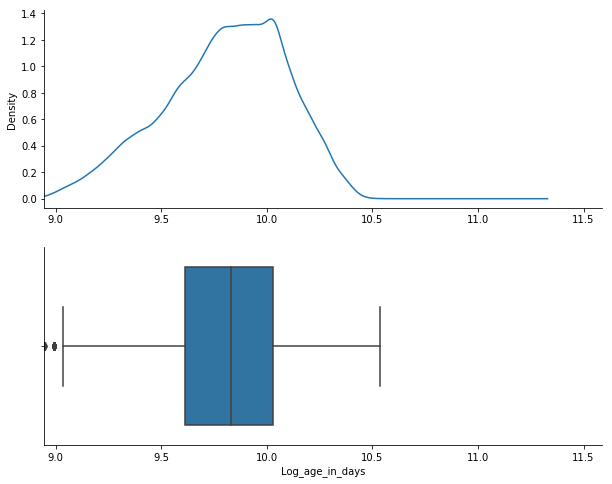

In [37]:
i = 'Log_age_in_days'
 
plt.figure(figsize=(10,8))
plt.subplot(211)
plt.xlim(data[i].min(), data[i].max()*1.1)
 
ax = data[i].plot(kind='kde')
 
plt.subplot(212)
plt.xlim(data[i].min(), data[i].max()*1.1)
sns.boxplot(x=data[i])

In [38]:
data.head()

,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,Income,age_in_days,application_underwriting_score,id,no_of_premiums_paid,perc_premium_paid_by_cash_credit,premium,renewal,residence_area_type,source,sourcing_channel,Log_Income,Log_age_in_days
0,0.0,0.0,0.0,355060.0,12058,99.02,110936,13,0.429,3300,1.0,Urban,train,C,12.780042,9.397484
1,0.0,0.0,0.0,315150.0,21546,99.89,41492,21,0.010,18000,1.0,Urban,train,A,12.660804,9.977945
2,2.0,3.0,1.0,84140.0,17531,98.69,31300,7,0.917,3300,0.0,Rural,train,C,11.340237,9.771726
3,0.0,0.0,0.0,250510.0,15341,99.57,19415,9,0.049,9600,1.0,Urban,train,A,12.431254,9.638284
4,0.0,0.0,0.0,198680.0,31400,99.87,99379,12,0.052,9600,1.0,Urban,train,B,12.199451,10.354563


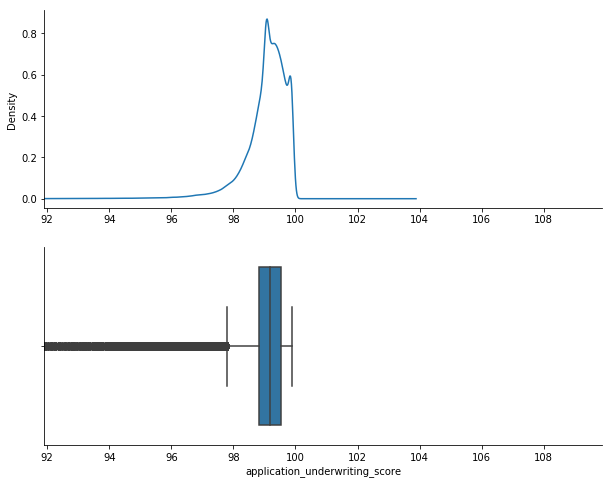

In [39]:
i = 'application_underwriting_score'
 
plt.figure(figsize=(10,8))
plt.subplot(211)
plt.xlim(data[i].min(), data[i].max()*1.1)
 
ax = data[i].plot(kind='kde')
 
plt.subplot(212)
plt.xlim(data[i].min(), data[i].max()*1.1)
sns.boxplot(x=data[i])

In [40]:
# Remove any zeros (otherwise we get (-inf)
#data.loc[data.application_underwriting_score == 0, 'application_underwriting_score'] = np.nan
 
# # Drop NA
# data.dropna(inplace=True)
 
# Log Transform
data['Log_' + i] = np.log(data[i])

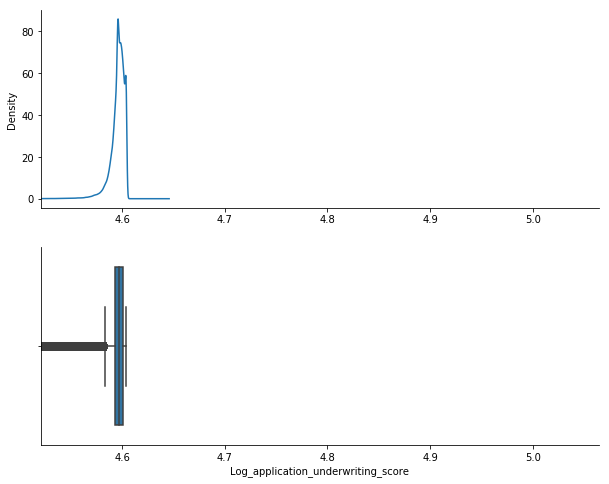

In [41]:
i = 'Log_application_underwriting_score'
 
plt.figure(figsize=(10,8))
plt.subplot(211)
plt.xlim(data[i].min(), data[i].max()*1.1)
 
ax = data[i].plot(kind='kde')
 
plt.subplot(212)
plt.xlim(data[i].min(), data[i].max()*1.1)
sns.boxplot(x=data[i])

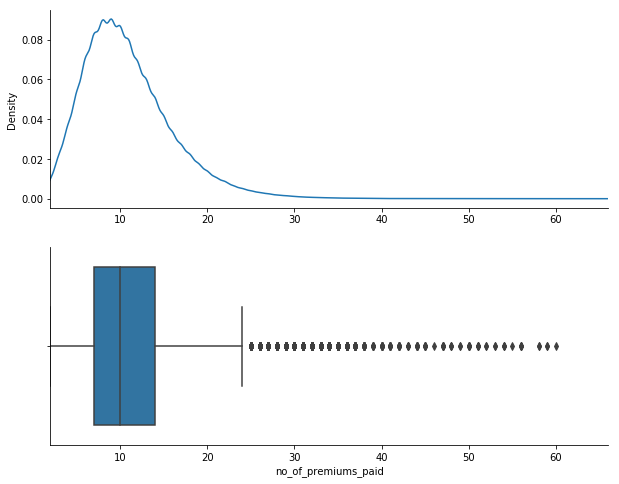

In [42]:
i = 'no_of_premiums_paid'
 
plt.figure(figsize=(10,8))
plt.subplot(211)
plt.xlim(data[i].min(), data[i].max()*1.1)
 
ax = data[i].plot(kind='kde')
 
plt.subplot(212)
plt.xlim(data[i].min(), data[i].max()*1.1)
sns.boxplot(x=data[i])

In [43]:
# Remove any zeros (otherwise we get (-inf)
#data.loc[data.no_of_premiums_paid == 0, 'no_of_premiums_paid'] = np.nan
 
# # Drop NA
# data.dropna(inplace=True)
 
# Log Transform
data['Log_' + i] = np.log(data[i])

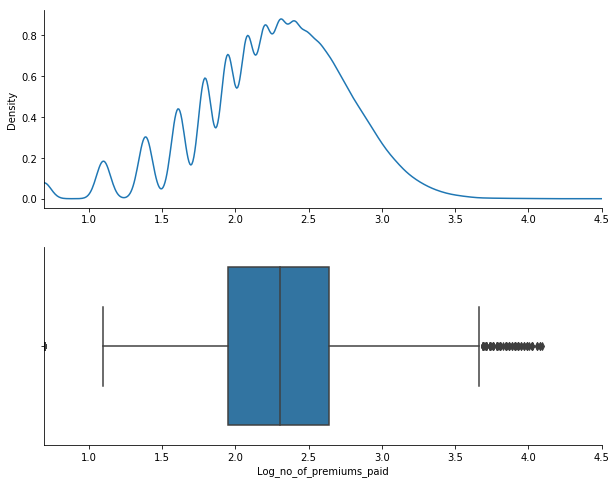

In [44]:
i = 'Log_no_of_premiums_paid'
 
plt.figure(figsize=(10,8))
plt.subplot(211)
plt.xlim(data[i].min(), data[i].max()*1.1)
 
ax = data[i].plot(kind='kde')
 
plt.subplot(212)
plt.xlim(data[i].min(), data[i].max()*1.1)
sns.boxplot(x=data[i])

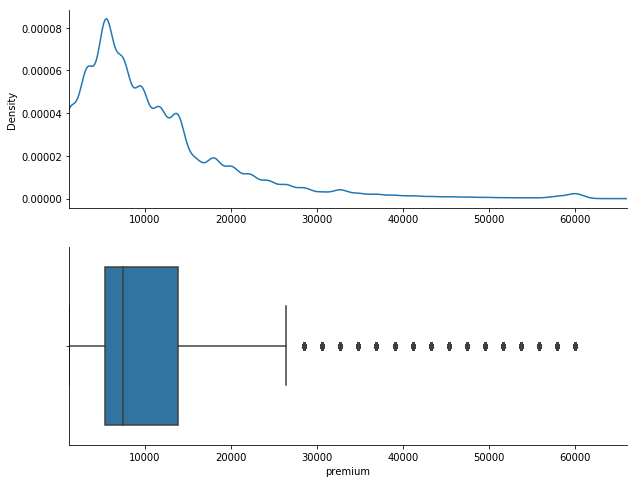

In [45]:
i = 'premium'
 
plt.figure(figsize=(10,8))
plt.subplot(211)
plt.xlim(data[i].min(), data[i].max()*1.1)
 
ax = data[i].plot(kind='kde')
 
plt.subplot(212)
plt.xlim(data[i].min(), data[i].max()*1.1)
sns.boxplot(x=data[i])

In [46]:
# Remove any zeros (otherwise we get (-inf)
# data.loc[data.premium == 0, 'premium'] = np.nan
 
# # Drop NA
# data.dropna(inplace=True)
 
# Log Transform
data['Log_' + i] = np.log(data[i])

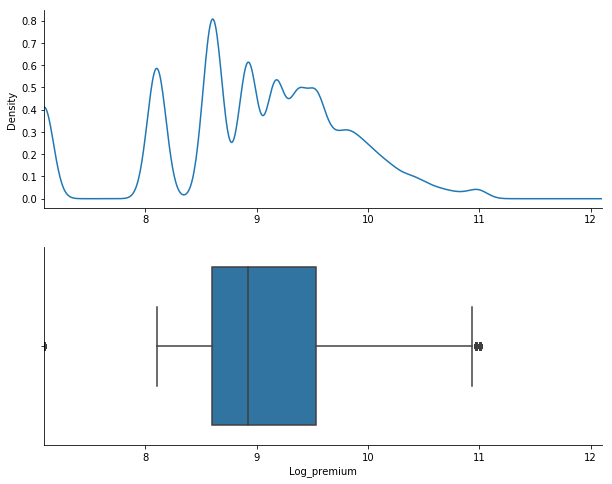

In [47]:
i = 'Log_premium'
 
plt.figure(figsize=(10,8))
plt.subplot(211)
plt.xlim(data[i].min(), data[i].max()*1.1)
 
ax = data[i].plot(kind='kde')
 
plt.subplot(212)
plt.xlim(data[i].min(), data[i].max()*1.1)
sns.boxplot(x=data[i])

In [48]:
data.apply(lambda x: len(x.unique()))

Count_3-6_months_late                     14
Count_6-12_months_late                    17
Count_more_than_12_months_late            10
Income                                 28925
age_in_days                              838
application_underwriting_score           714
id                                    114077
no_of_premiums_paid                       58
perc_premium_paid_by_cash_credit        1001
premium                                   30
renewal                                    3
residence_area_type                        2
source                                     2
sourcing_channel                           5
Log_Income                             28925
Log_age_in_days                          838
Log_application_underwriting_score       714
Log_no_of_premiums_paid                   58
Log_premium                               30
dtype: int64

In [49]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['residence_area_type','sourcing_channel']

le = LabelEncoder()

for i in var_mod:
    data[i] = le.fit_transform(data[i].astype(str))

data.dtypes 

Count_3-6_months_late                 float64
Count_6-12_months_late                float64
Count_more_than_12_months_late        float64
Income                                float64
age_in_days                             int64
application_underwriting_score        float64
id                                      int64
no_of_premiums_paid                     int64
perc_premium_paid_by_cash_credit      float64
premium                                 int64
renewal                               float64
residence_area_type                     int64
source                                 object
sourcing_channel                        int64
Log_Income                            float64
Log_age_in_days                       float64
Log_application_underwriting_score    float64
Log_no_of_premiums_paid               float64
Log_premium                           float64
dtype: object

In [50]:
data.head()

,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,Income,age_in_days,application_underwriting_score,id,no_of_premiums_paid,perc_premium_paid_by_cash_credit,premium,renewal,residence_area_type,source,sourcing_channel,Log_Income,Log_age_in_days,Log_application_underwriting_score,Log_no_of_premiums_paid,Log_premium
0,0.0,0.0,0.0,355060.0,12058,99.02,110936,13,0.429,3300,1.0,1,train,2,12.780042,9.397484,4.595322,2.564949,8.101678
1,0.0,0.0,0.0,315150.0,21546,99.89,41492,21,0.010,18000,1.0,1,train,0,12.660804,9.977945,4.604070,3.044522,9.798127
2,2.0,3.0,1.0,84140.0,17531,98.69,31300,7,0.917,3300,0.0,0,train,2,11.340237,9.771726,4.591984,1.945910,8.101678
3,0.0,0.0,0.0,250510.0,15341,99.57,19415,9,0.049,9600,1.0,1,train,0,12.431254,9.638284,4.600861,2.197225,9.169518
4,0.0,0.0,0.0,198680.0,31400,99.87,99379,12,0.052,9600,1.0,1,train,1,12.199451,10.354563,4.603869,2.484907,9.169518


In [51]:
from sklearn import preprocessing



cols_to_scale = ['Count_3-6_months_late','Count_6-12_months_late','Count_more_than_12_months_late','perc_premium_paid_by_cash_credit','residence_area_type','sourcing_channel','Log_Income','Log_age_in_days','Log_application_underwriting_score','Log_no_of_premiums_paid','Log_premium' ]

min_max_scaler = preprocessing.MinMaxScaler()

for col in cols_to_scale:
    data[col] = pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(data[col])),columns=[col])



In [52]:
data.head()

,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,Income,age_in_days,application_underwriting_score,id,no_of_premiums_paid,perc_premium_paid_by_cash_credit,premium,renewal,residence_area_type,source,sourcing_channel,Log_Income,Log_age_in_days,Log_application_underwriting_score,Log_no_of_premiums_paid,Log_premium
0,0.000000,0.000000,0.000000,355060.0,12058,99.02,110936,13,0.429,3300,1.0,1.0,train,0.50,0.327169,0.284582,0.895072,0.550336,0.258588
1,0.000000,0.000000,0.000000,315150.0,21546,99.89,41492,21,0.010,18000,1.0,1.0,train,0.00,0.312683,0.649712,1.000000,0.691337,0.692238
2,0.153846,0.176471,0.090909,84140.0,17531,98.69,31300,7,0.917,3300,0.0,0.0,train,0.50,0.152248,0.519993,0.855030,0.368330,0.258588
3,0.000000,0.000000,0.000000,250510.0,15341,99.57,19415,9,0.049,9600,1.0,1.0,train,0.00,0.284795,0.436054,0.961512,0.442220,0.531551
4,0.000000,0.000000,0.000000,198680.0,31400,99.87,99379,12,0.052,9600,1.0,1.0,train,0.25,0.256633,0.886617,0.997598,0.526803,0.531551


In [53]:
data.apply(lambda x: sum(x.isnull()))

Count_3-6_months_late                     0
Count_6-12_months_late                    0
Count_more_than_12_months_late            0
Income                                    0
age_in_days                               0
application_underwriting_score            0
id                                        0
no_of_premiums_paid                       0
perc_premium_paid_by_cash_credit          0
premium                                   0
renewal                               34224
residence_area_type                       0
source                                    0
sourcing_channel                          0
Log_Income                                0
Log_age_in_days                           0
Log_application_underwriting_score        0
Log_no_of_premiums_paid                   0
Log_premium                               0
dtype: int64

In [54]:
# #Drop the columns which have been converted to different types:
# data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

#Drop unnecessary columns:
test.drop(['renewal','source','Income','age_in_days','application_underwriting_score','no_of_premiums_paid','premium'],axis=1,inplace=True)
train.drop(['source','Income','age_in_days','application_underwriting_score','no_of_premiums_paid','premium'],axis=1,inplace=True)

#Export files as modified versions:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [55]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34224 entries, 79853 to 114076
Data columns (total 12 columns):
Count_3-6_months_late                 34224 non-null float64
Count_6-12_months_late                34224 non-null float64
Count_more_than_12_months_late        34224 non-null float64
id                                    34224 non-null int64
perc_premium_paid_by_cash_credit      34224 non-null float64
residence_area_type                   34224 non-null float64
sourcing_channel                      34224 non-null float64
Log_Income                            34224 non-null float64
Log_age_in_days                       34224 non-null float64
Log_application_underwriting_score    34224 non-null float64
Log_no_of_premiums_paid               34224 non-null float64
Log_premium                           34224 non-null float64
dtypes: float64(11), int64(1)
memory usage: 3.4 MB


In [56]:
#Model building

#Mean based:
median_renewal = train['renewal'].median()

#Define a dataframe with IDs for submission:
base1 = test[['id']]
base1['renewal'] = median_renewal

#Export submission file
base1.to_csv("alg0.csv",index=False)

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


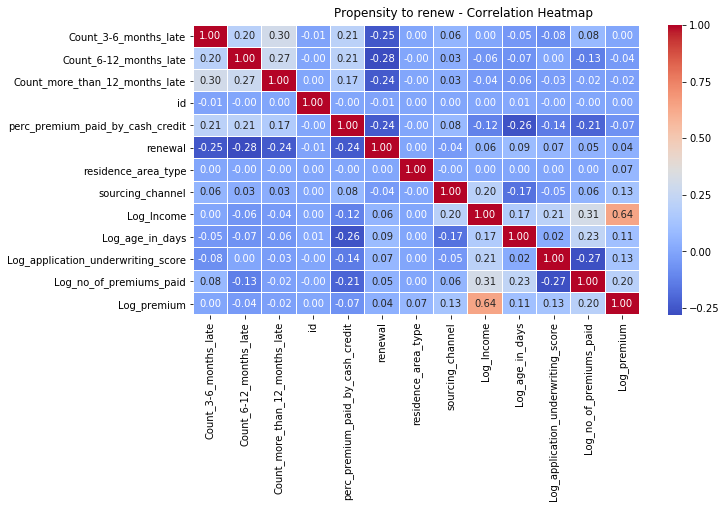

In [57]:
f, ax = plt.subplots(figsize=(10, 5))

corrMatt = train.corr()

hm = sns.heatmap(round(corrMatt,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Propensity to renew - Correlation Heatmap', fontsize=12)




In [58]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(data.shape[0], n_folds=5)
  error = []
  for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome]) 


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [59]:
#Count_3-6_months_late	Count_6-12_months_late	Count_more_than_12_months_late	id	perc_premium_paid_by_cash_credit	renewal	residence_area_type	sourcing_channel	Log_Income	Log_age_in_days	Log_application_underwriting_score	Log_no_of_premiums_paid	Log_premium

#Logistic Regression


outcome_var = 'renewal'
model_lr = LogisticRegression()
predictor_var = ['Log_premium']
X_train = train[predictor_var]
y_train = train[outcome_var] 
classification_model(model_lr, train,predictor_var,outcome_var)

Accuracy : 93.741%
Cross-Validation Score : 93.741%


In [60]:
#We can try different combination of variables:
predictor_var = ['Log_premium','Log_Income','Log_no_of_premiums_paid','Log_application_underwriting_score','Log_age_in_days']
X_train = train[predictor_var]
y_train = train[outcome_var]  
classification_model(model_lr, train,predictor_var,outcome_var)

Accuracy : 93.740%
Cross-Validation Score : 93.741%


In [61]:
#We can try different combination of variables:
predictor_var = ['Log_premium','Log_Income','Log_no_of_premiums_paid','Log_application_underwriting_score','Log_age_in_days','Count_3-6_months_late','Count_6-12_months_late','Count_more_than_12_months_late','perc_premium_paid_by_cash_credit','residence_area_type','sourcing_channel']
X_train = train[predictor_var]
y_train = train[outcome_var]  
classification_model(model_lr, train,predictor_var,outcome_var)

Accuracy : 93.915%
Cross-Validation Score : 93.919%


In [62]:
#Decision Tree

#Decision tree is another method for making a predictive model. It is known to provide higher accuracy than logistic regression model. 

model_dt = DecisionTreeClassifier()
predictor_var = ['Log_premium','Log_Income','Log_no_of_premiums_paid','Log_application_underwriting_score','Log_age_in_days','Count_3-6_months_late','Count_6-12_months_late','Count_more_than_12_months_late','perc_premium_paid_by_cash_credit','residence_area_type','sourcing_channel']
X_train = train[predictor_var]
y_train = train[outcome_var]  
classification_model(model_dt, train,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 89.697%


In [63]:
# Random Forest
# Random forest is another algorithm for solving the classification problem.

# An advantage with Random Forest is that we can make it work with all the features and it returns a feature importance matrix which can be used to select features.

model_rf1 = RandomForestClassifier(n_estimators=100)
predictor_var = ['Log_premium','Log_Income','Log_no_of_premiums_paid','Log_application_underwriting_score','Log_age_in_days','Count_3-6_months_late','Count_6-12_months_late','Count_more_than_12_months_late','perc_premium_paid_by_cash_credit','residence_area_type','sourcing_channel']
X_train = train[predictor_var]
y_train = train[outcome_var]  
classification_model(model_rf1, train,predictor_var,outcome_var)

Accuracy : 99.997%
Cross-Validation Score : 93.797%


In [64]:
# Here we see that the accuracy is almost 100% for the training set. This is the ultimate case of overfitting and can be resolved in two ways:

# 1. Reducing the number of predictors
# 2. Tuning the model parameters

# Let’s try both of these. First we see the feature importance matrix from which we’ll take the most important features.

In [65]:
#Create a series with feature importances:
featimp = pd.Series(model_rf1.feature_importances_, index=predictor_var).sort_values(ascending=False)
print(featimp)

Log_Income                            0.161889
Log_age_in_days                       0.155402
perc_premium_paid_by_cash_credit      0.153673
Log_application_underwriting_score    0.139425
Log_no_of_premiums_paid               0.091526
Count_6-12_months_late                0.075501
Log_premium                           0.075308
Count_3-6_months_late                 0.047564
sourcing_channel                      0.040742
Count_more_than_12_months_late        0.038313
residence_area_type                   0.020658
dtype: float64


In [66]:
#Let’s use the top 5 variables for creating a model. Also, we will modify the parameters of random forest model a little bit:

model_rf2 = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var = ['Log_Income','Log_age_in_days','perc_premium_paid_by_cash_credit','Log_application_underwriting_score','Log_no_of_premiums_paid']
X_train = train[predictor_var]
y_train = train[outcome_var] 
classification_model(model_rf2, train,predictor_var,outcome_var)

Accuracy : 93.741%
Cross-Validation Score : 93.741%


In [67]:
# Notice that although accuracy reduced, but the cross-validation score is improving showing that the model is generalizing well. Remember that random forest models are not exactly repeatable. Different runs will result in slight variations because of randomization. But the output should stay in the ballpark.

# You would have noticed that even after some basic parameter tuning on random forest, we have reached a cross-validation accuracy only slightly better than the original logistic regression model. This exercise gives us some very interesting and unique learning:

# Using a more sophisticated model does not guarantee better results.
# Avoid using complex modeling techniques as a black box without understanding the underlying concepts. Doing so would increase the tendency of overfitting thus making your models less interpretable
# Feature Engineering is the key to success. Everyone can use an Xgboost models but the real art and creativity lies in enhancing your features to better suit the model

In [68]:
#Prediction
#Read Test File
test = pd.read_csv("test_modified.csv") 

#let us check the number of nulls / NaNs in the dataset

test.apply(lambda x: sum(x.isnull()),axis=0)

Count_3-6_months_late                 0
Count_6-12_months_late                0
Count_more_than_12_months_late        0
id                                    0
perc_premium_paid_by_cash_credit      0
residence_area_type                   0
sourcing_channel                      0
Log_Income                            0
Log_age_in_days                       0
Log_application_underwriting_score    0
Log_no_of_premiums_paid               0
Log_premium                           0
dtype: int64

In [69]:
test.head()

,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,id,perc_premium_paid_by_cash_credit,residence_area_type,sourcing_channel,Log_Income,Log_age_in_days,Log_application_underwriting_score,Log_no_of_premiums_paid,Log_premium
0,0.000000,0.0,0.0,649,0.001,0.0,0.00,0.091780,0.800535,1.000000,0.368330,0.258588
1,0.000000,0.0,0.0,81136,0.124,1.0,0.00,0.300525,0.710578,0.884164,0.661912,0.582120
2,0.000000,0.0,0.0,70762,1.000,1.0,0.25,0.248641,0.506905,0.900603,0.000000,0.582120
3,0.000000,0.0,0.0,53935,0.198,0.0,0.25,0.198910,0.465178,0.892649,0.501220,0.384476
4,0.076923,0.0,0.0,15476,0.041,0.0,0.00,0.257450,0.202982,0.913228,0.572125,0.531551


In [70]:
#Prediction
predictor_var = ['Log_Income','Log_age_in_days','perc_premium_paid_by_cash_credit','Log_application_underwriting_score','Log_no_of_premiums_paid']

test['renewal'] = model_rf2.predict(test[predictor_var])
# df_test.loc[df_test.Loan_Status == 1 , 'Loan_Status' ] = 'Y'
# df_test.loc[df_test.Loan_Status == 0 , 'Loan_Status' ] = 'N'

X_test = test[predictor_var]

#Submission

pd.DataFrame(test, columns=['id' , 'renewal']).to_csv('prediction.csv')

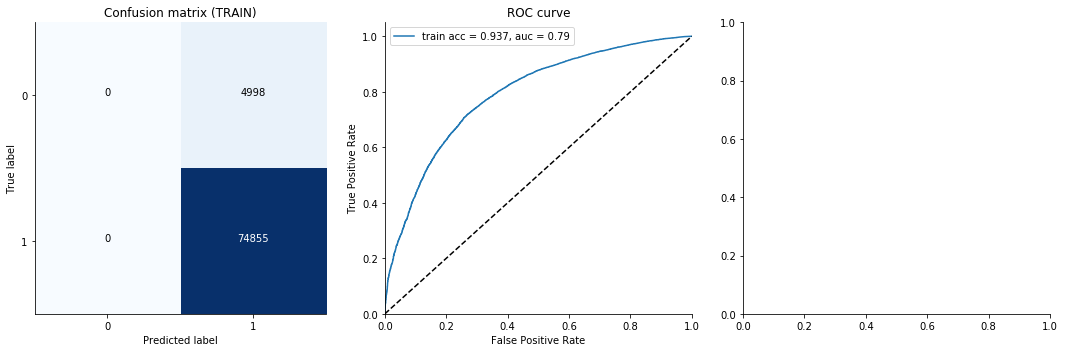

In [71]:
# from sklearn.metrics import roc_curve, auc, roc_auc_score, log_loss, accuracy_score

threshold = 0.5
y_train_pred = model_rf2.predict_proba(X_train)[:,1]
#y_test_pred = model_rf2.predict_proba(X_test)[:,1]


fig,ax = plt.subplots(1,3)
fig.set_size_inches(15,5)

plot_cm(ax[0],  y_train, y_train_pred, [0,1], 'Confusion matrix (TRAIN)', threshold)
#plot_cm(ax[1],  y_test, y_test_pred,   [0,1], 'Confusion matrix (TEST)', threshold)
plot_auc(ax[1], y_train, y_train_pred, threshold)
    
plt.tight_layout()
plt.show()